---
### Импортируем необходимые библиотеки 
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline 

---
### Загружаем данные
---

In [2]:
df = pd.read_csv('3_task_data.csv')
df.head()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5498546,0.0,0,40364,0,0.0,3000,560,0.0,0.0,...,0.0,0,0.00,0,0,3,50000,46,NaN,0
1,5498604,1500.0,0,23456,0,0.0,0,9999,0.0,0.0,...,0.0,0,0.00,0,0,3,35000,17,NaN,0
2,5498609,0.1,0,17999,3,0.0,9999,9999,0.1,9999.0,...,0.0,0,0.00,0,2,3,35000,58,NaN,0
3,5498645,5000.0,0,313247,0,0.0,0,9999,0.0,0.0,...,0.0,0,4923.97,0,0,5,35000,4,NaN,0
4,5498647,0.0,0,0,1,0.0,0,9999,0.0,0.0,...,0.0,0,0.00,0,0,5,35000,34,NaN,0


---
### Смотрим размерность полученного датафрейма
---

In [3]:
df.shape

(23116, 25)

---
### Анализируем типы данных
---

In [4]:
df.dtypes

order_id                          int64
cred_sum_cc_all                 float64
mfo_inqs_count_month              int64
all_closed_creds_sum_all          int64
bank_inqs_count_quarter           int64
cred_max_overdue_max_ly         float64
all_active_creds_sum_all          int64
mfo_last_days_all                 int64
cred_sum_cc_ly                  float64
cred_sum_debt_all_all           float64
all_closed_creds_sum_ly           int64
mfo_cred_mean_sum_3lm           float64
delay_more_sum_all                int64
all_creds_count_all               int64
cred_day_overdue_all_sum_all      int64
cred_max_overdue_max_3lm        float64
mfo_closed_count_ly               int64
cred_sum_overdue_cc_all         float64
count_overdue_all_3lm             int64
all_creds_count_lm                int64
work_code                         int64
month_income                      int64
region                            int64
bad                             float64
approved                          int64


---
### Проверяем наличие пропусков в данных
---

In [5]:
df.isna().sum()

order_id                            0
cred_sum_cc_all                     0
mfo_inqs_count_month                0
all_closed_creds_sum_all            0
bank_inqs_count_quarter             0
cred_max_overdue_max_ly             0
all_active_creds_sum_all            0
mfo_last_days_all                   0
cred_sum_cc_ly                      0
cred_sum_debt_all_all               0
all_closed_creds_sum_ly             0
mfo_cred_mean_sum_3lm               0
delay_more_sum_all                  0
all_creds_count_all                 0
cred_day_overdue_all_sum_all        0
cred_max_overdue_max_3lm            0
mfo_closed_count_ly                 0
cred_sum_overdue_cc_all             0
count_overdue_all_3lm               0
all_creds_count_lm                  0
work_code                           0
month_income                        0
region                              0
bad                             15847
approved                            0
dtype: int64

---
### Заполняем NaN в столбце bad                         
---

In [6]:
df.fillna(2, inplace=True) 

---
### Проверяем наличие дубликатов в данных
---

In [7]:
df.duplicated().sum()

0

---
### Анализируем описательные статистики
---

In [8]:
round(df.drop(['order_id', 'bad', 'approved', 'work_code', 'region'], axis=1).describe())

,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,mfo_cred_mean_sum_3lm,delay_more_sum_all,all_creds_count_all,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,month_income
count,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0,23116.0
mean,44248.0,1.0,165357.0,4.0,4071.0,128421.0,2616.0,10672.0,84147.0,30069.0,4229.0,5.0,11.0,259.0,1107.0,3.0,4878.0,0.0,1.0,39363.0
std,100602.0,2.0,478894.0,5.0,26890.0,389072.0,4229.0,37247.0,305472.0,102117.0,8217.0,12.0,19.0,768.0,7074.0,9.0,37937.0,0.0,2.0,13888.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,3000.0,0.0,0.0,2000.0,13.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,35000.0
50%,5000.0,0.0,30834.0,2.0,0.0,15000.0,84.0,0.0,5000.0,0.0,1000.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,35000.0
75%,49727.0,2.0,135776.0,5.0,3000.0,75000.0,2070.0,0.0,34961.0,20000.0,6267.0,5.0,13.0,70.0,0.0,3.0,0.0,0.0,1.0,50000.0
max,5739786.0,25.0,30309967.0,67.0,1914581.0,12000000.0,9999.0,878000.0,11508247.0,4929320.0,315200.0,171.0,546.0,15327.0,673495.0,344.0,2878197.0,10.0,48.0,65000.0


---
### Анализируем столбец mfo_inqs_count_month
---

In [9]:
df.query('mfo_inqs_count_month > 20') \
    .groupby('work_code') \
        .agg({'order_id' : 'count'}) \
            .rename(columns={'order_id' : 'number_of_clients'})

,number_of_clients
work_code,
1,1
2,4
3,2
4,3
5,8


---
### Анализируем столбец all_closed_creds_sum_all
---

In [10]:
df.query('all_closed_creds_sum_all > 10000000')

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
8795,5875792,0.0,0,10224834,5,9355.17,4896165,9999,0.0,20356.98,...,0.0,0,0.00,0,0,2,50000,45,2.0,0
15014,6162636,1342500.0,1,11502013,12,12681.84,2472356,8,0.0,1743684.88,...,0.0,0,13802.56,0,1,5,60000,45,2.0,0
18979,6512258,140000.0,0,30309967,2,0.00,3557887,9999,0.0,1181883.29,...,0.0,0,0.00,0,0,1,60000,39,2.0,0


---
### Анализируем столбец bank_inqs_count_quarter
---

In [11]:
df['month_income_interval'] = pd.cut(df.month_income, [0, 15000, 30000, 45000, 75000],
 labels=['less than 15000', '15000–30000', '30000–45000', 'more than 45000'])

In [12]:
df.query('bank_inqs_count_quarter > 20') \
    .groupby('region') \
        .agg({'order_id' : 'count'}) \
            .rename(columns={'order_id' : 'number_of_clients'}) \
                .sort_values('number_of_clients', ascending=False)

,number_of_clients
region,
46,23
45,17
60,17
80,14
3,14
...,...
19,1
88,1
37,1


In [13]:
df.query('bank_inqs_count_quarter > 20') \
    .groupby('month_income_interval') \
        .agg({'order_id' : 'count'}) \
            .rename(columns={'order_id' : 'number_of_clients'}) \
                .sort_values('number_of_clients', ascending=False)


,number_of_clients
month_income_interval,
more than 45000,213
30000–45000,108
15000–30000,26
less than 15000,2


In [14]:
df.query('bank_inqs_count_quarter > 20') \
    .groupby('bad') \
        .agg({'order_id' : 'count'}) \
            .rename(columns={'order_id' : 'number_of_clients'}) \
                .sort_values('number_of_clients', ascending=False)

,number_of_clients
bad,
0.0,190
2.0,85
1.0,82


---
### Анализируем столбец cred_sum_overdue_cc_all
---

In [15]:
round(df.cred_sum_overdue_cc_all.describe())

count      23116.0
mean        4878.0
std        37937.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max      2878197.0
Name: cred_sum_overdue_cc_all, dtype: float64

In [16]:
df.query('cred_sum_overdue_cc_all == 0').shape[0] / df.shape[0] * 100

87.73576743381207

---
### Анализируем столбец count_overdue_all_3lm
---

In [17]:
round(df.count_overdue_all_3lm.describe())

count    23116.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         10.0
Name: count_overdue_all_3lm, dtype: float64

In [18]:
df.query('count_overdue_all_3lm == 0').shape[0] / df.shape[0] * 100

91.14033569821768

---
### Анализируем столбец all_creds_count_lm
---

In [19]:
round(df.all_creds_count_lm.describe())

count    23116.0
mean         1.0
std          2.0
min          0.0
25%          0.0
50%          0.0
75%          1.0
max         48.0
Name: all_creds_count_lm, dtype: float64

In [20]:
round(df.query('all_creds_count_lm == 0').shape[0] / df.shape[0] * 100)

58

In [21]:
round(df.query('all_creds_count_lm == 1').shape[0] / df.shape[0] * 100)

19

In [22]:
round(df.query('all_creds_count_lm > 1').shape[0] / df.shape[0] * 100)

23

In [23]:
df['all_creds_count_lm_interval'] = pd.cut(df.all_creds_count_lm, [-1, 0, 10, 50],
  labels=['0', '1–10', 'more than 10'])

In [24]:
df_numb_of_clients_by_all_creds_count_lm_interval = df.all_creds_count_lm_interval.value_counts() \
    .to_frame() \
        .reset_index() \
            .rename(columns={'index' : 'all_creds_count_lm_interval', 'all_creds_count_lm_interval' : 'number_of_clients'})

In [25]:
colors = ['pink','darkorange','mediumpurple']

fig = go.Figure(data=[go.Pie(labels=df_numb_of_clients_by_all_creds_count_lm_interval['all_creds_count_lm_interval'],
                             values=df_numb_of_clients_by_all_creds_count_lm_interval['number_of_clients'])])
fig.update_traces(
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text='Клиенты по количеству кредитов, взятых ими за последний месяц',
    title={'y': 0.95,
        'x': 0.45,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

---
### Анализируем столбец region
---

In [26]:
df.region.value_counts().iloc[: 5]

45    1115
46    1091
3      883
65     808
80     796
Name: region, dtype: int64

---
### Анализируем столбец work_code
---

In [27]:
df.work_code.value_counts()

5    7747
2    4881
3    4834
4    3570
1    2084
Name: work_code, dtype: int64

In [28]:
round(df.query('work_code == 5').shape[0] / df.shape[0] * 100)

34

In [29]:
round(df.query('work_code == 1').shape[0] / df.shape[0] * 100)

9

---
### Анализируем столбец month_income
---

In [30]:
df.month_income.describe()

count    23116.000000
mean     39363.189998
std      13887.644526
min          0.000000
25%      35000.000000
50%      35000.000000
75%      50000.000000
max      65000.000000
Name: month_income, dtype: float64

In [31]:
df_numb_of_clients_by_income = df.month_income_interval.value_counts() \
    .to_frame() \
        .reset_index() \
            .rename(columns={'index' : 'month_income_interval', 'month_income_interval' : 'number_of_clients'})

In [32]:

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=df_numb_of_clients_by_income['month_income_interval'],
                             values=df_numb_of_clients_by_income['number_of_clients'])])
fig.update_traces(
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text='Клиенты по уровню дохода',
    title={'y': 0.95,
        'x': 0.45,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

---
### Анализируем разбиение клиентов в зависимости от cred_sum_debt_all_all (суммы задолженности по всем кредитам)
---

In [33]:
df['cred_sum_debt_all_all_interval'] = pd.cut(df.cred_sum_debt_all_all, [-1, 0, 100000, 500000, 1000000, 11508248],
 labels=['0', 'up to 100000', '100000–500000', '500000–1000000', 'more than 1000000'])

In [34]:
df_numb_of_clients_by_cred_sum_debt_all_all_interval = df.cred_sum_debt_all_all_interval.value_counts() \
    .to_frame() \
        .reset_index() \
            .rename(columns={'index' : 'cred_sum_debt_all_all_interval', 'cred_sum_debt_all_all_interval' : 'number_of_clients'})

In [35]:
colors = ['aquamarine','darkorange','hotpink', 'yellowgreen', 'yellow']

fig = go.Figure(data=[go.Pie(labels=df_numb_of_clients_by_cred_sum_debt_all_all_interval['cred_sum_debt_all_all_interval'],
                             values=df_numb_of_clients_by_cred_sum_debt_all_all_interval['number_of_clients'])])
fig.update_traces(
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text='Количество клиентов в разрезе суммы задолженности по всем кредитам',
    title={'y': 0.95,
        'x': 0.45,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

---
### Анализируем разбиение клиентов в зависимости от all_active_creds_sum_all (денежной суммы всех активных кредитов)
---

In [36]:
df['all_active_creds_sum_all_interval'] = pd.cut(df.all_active_creds_sum_all, [-1, 0, 10000, 50000, 100000, 500000, 1000000, 12000001], 
 labels=['0', 'up to 10000', '10000–50000', '50000–100000', '100000–500000', '500000–1000000', 'more than 1000000'])

In [37]:
df_numb_of_clients_by_all_active_creds_sum_all_interval = df.all_active_creds_sum_all_interval.value_counts() \
    .to_frame() \
        .reset_index() \
            .rename(columns={'index' : 'all_active_creds_sum_all_interval', 'all_active_creds_sum_all_interval' : 'number_of_clients'})

In [38]:
colors = ['aquamarine','darkorange','hotpink', 'yellowgreen', 'yellow', 'pink', 'green']

fig = go.Figure(data=[go.Pie(labels=df_numb_of_clients_by_all_active_creds_sum_all_interval['all_active_creds_sum_all_interval'],
                             values=df_numb_of_clients_by_all_active_creds_sum_all_interval['number_of_clients'])])
fig.update_traces(
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text='Количество клиентов в разрезе размера денежной суммы всех активных кредитов',
    title={'y': 0.95,
        'x': 0.45,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

---
### Анализируем значения показателей по клиентам в разрезе их профессий (work_code)
---

---
### 1. Среднее общее количество кредитов в разрезе профессий
---

In [39]:
df_number_credits_by_work = round(df.groupby('work_code') \
    .agg({'all_creds_count_all' : 'mean'})).reset_index() \
        .rename(columns={'all_creds_count_all' : 'mean_number_credits'})

In [40]:
fig = px.bar(df_number_credits_by_work, x='work_code', y='mean_number_credits', 
labels={'work_code' : 'Профессия', 'mean_number_credits': 'Среднее общее количество кредитов'},
 title='Среднее общее количество кредитов в разрезе профессий',
 width=950, height=600)
fig.update_layout(
    title={'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis=dict(tickvals = [1, 2, 3, 4, 5], ticktext = ['Госслужащий', '2', 'Офисный работник', '4', 'Рабочие профессии'], showline=True, ticks='outside', 
                   linewidth=1))
fig.show()

---
### 2. Средняя сумма кредитов по кредитным картам в разрезе профессий
---

In [41]:
df_mean_credit_by_work = round(df.groupby('work_code') \
    .agg({'cred_sum_cc_all' : 'mean'})).reset_index() \
        .rename(columns={'cred_sum_cc_all' : 'mean_cred_sum'})

In [42]:
fig = px.bar(df_mean_credit_by_work, x='work_code', y='mean_cred_sum', 
labels={'work_code' : 'Профессия', 'mean_cred_sum': 'Средняя сумма кредитов по кредитным картам'},
 title='Средняя сумма кредитов по кредитным картам в разрезе профессий',
 width=950, height=600)
fig.update_layout(
    title={'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis=dict(tickvals = [1, 2, 3, 4, 5], ticktext = ['Госслужащий', '2', 'Офисный работник', '4', 'Рабочие профессии'], showline=True, ticks='outside', 
                   linewidth=1)
                )

fig.show()

---
### 3. Среднее количество запросов на кредиты в банке в разрезе профессий
---

In [43]:
df_mean_inqs_by_work = round(df.groupby('work_code') \
    .agg({'bank_inqs_count_quarter' : 'mean'})).reset_index() \
        .rename(columns={'bank_inqs_count_quarter' : 'mean_number_inqs'})

In [44]:
fig = px.bar(df_mean_inqs_by_work, x='work_code', y='mean_number_inqs', 
labels={'work_code' : 'Профессия', 'mean_number_inqs': 'Среднее количество запросов на кредиты в банки'},
 title='Среднее количество запросов на кредиты в банки в разрезе профессий',
 width=950, height=600)
fig.update_layout(
    title={'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis=dict(tickvals = [1, 2, 3, 4, 5], ticktext = ['Госслужащий', '2', 'Офисный работник', '4', 'Рабочие профессии'], showline=True, ticks='outside', 
                   linewidth=1)
                )

fig.show()

---
### 4. Среднее количество просрочек более чем на 90 дней по всем кредитам в разрезе профессий
---

In [45]:
df_mean_numb_cred_by_work = round(df.groupby('work_code') \
    .agg({'delay_more_sum_all' : 'mean'})).reset_index() \
        .rename(columns={'delay_more_sum_all' : 'mean_delay_numb'})

In [46]:
fig = px.bar(df_mean_numb_cred_by_work, x='work_code', y='mean_delay_numb', 
labels={'work_code' : 'Профессия', 'mean_delay_numb': 'Среднее количество просрочек более чем на 90 дней по всем кредитам'},
 title='Среднее количество просрочек более чем на 90 дней по всем кредитам в разрезе профессии',
 width=950, height=600)
fig.update_layout(
    title={'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis=dict(tickvals = [1, 2, 3, 4, 5], ticktext = ['Госслужащий', '2', 'Офисный работник', '4', 'Рабочие профессии'], showline=True, ticks='outside', 
                   linewidth=1)
                )

fig.show()

---
### 5. Средняя сумма задолженности по всем кредитам в разрезе профессий
---

In [47]:
df_mean_debt_by_work = round(df.groupby('work_code') \
    .agg({'cred_sum_debt_all_all' : 'mean'})).reset_index() \
        .rename(columns={'cred_sum_debt_all_all' : 'mean_cred_sum_debt'})

In [48]:
fig = px.bar(df_mean_debt_by_work, x='work_code', y='mean_cred_sum_debt', 
labels={'work_code' : 'Профессия', 'mean_cred_sum_debt': 'Средняя сумма задолженности по всем кредитам'},
 title='Средняя сумма задолженности по всем кредитам в разрезе профессий',
 width=950, height=600)
fig.update_layout(
    title={'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis=dict(tickvals = [1, 2, 3, 4, 5], ticktext = ['Госслужащий', '2', 'Офисный работник', '4', 'Рабочие профессии'], showline=True, ticks='outside', 
                   linewidth=1)
                )

fig.show()

---
### Анализируем значения показателей по клиентам в разрезе суммы их ежемесячных доходов (month_income)
---

---
### 1. Средняя сумма закрытых кредитов за последний год в разрезе ежемесячных доходов клиентов
---

In [49]:
df_mean_numb_cred_by_income = round(df.groupby('month_income_interval') \
    .agg({'all_closed_creds_sum_ly' : 'mean'})).reset_index() \
        .rename(columns={'all_closed_creds_sum_ly' : 'mean_closed_creds_sum'})

In [50]:
fig = px.bar(df_mean_numb_cred_by_income, x='month_income_interval', y='mean_closed_creds_sum', 
labels={'month_income_interval' : 'Доход', 'mean_closed_creds_sum': 'Средняя сумма закрытых кредитов за последний год'},
 title='Средняя сумма закрытых кредитов за последний год в разрезе дохода',
 width=950, height=600)
fig.update_layout( 
    title={'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
            
fig.show()

---
### 2. Среднее количество просрочек более чем на 90 дней по всем кредитам в разрезе дохода
---

In [51]:
df_mean_numb_delay_cred = round(df.groupby('month_income_interval') \
    .agg({'delay_more_sum_all' : 'mean'})).reset_index() \
        .rename(columns={'delay_more_sum_all' : 'mean_delay_numb'})

In [52]:
fig = px.bar(df_mean_numb_delay_cred, x='month_income_interval', y='mean_delay_numb', 
labels={'month_income_interval' : 'Доход', 'mean_delay_numb': 'Среднее количество просрочек более чем на 90 дней по всем кредитам'},
 title='Среднее количество просрочек более чем на 90 дней по всем кредитам в разрезе дохода',
 width=950, height=600)
fig.update_layout(
    title={'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})    

fig.show()

---
### Анализируем значения переменных в разрезе регионов (region)
---

---
### 1. Среднее количество просрочек по кредитным картам в разрезе регионов
---

In [53]:
df_mean_cred_sum_by_region = round(df.groupby('region', as_index=False) \
    .agg({'cred_sum_overdue_cc_all' : 'mean'})) \
        .rename(columns={'cred_sum_overdue_cc_all' : 'cred_sum_delay'})

In [54]:

fig = px.scatter(df_mean_cred_sum_by_region, x='region', y='cred_sum_delay',
labels={'region' : 'Регион', 'cred_sum_delay' : 'Средняя сумма просрочек по кредитным картам'},
 title='Средняя сумма просрочек по кредитным картам в разрезе регионов',
 width=950, height=600)
fig.update_layout(
    title={'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
        
fig.show()

---
### 2. Среднее количество запросов на кредиты в другие МФО в разрезе регионов
---

In [55]:
df_mean_inqs_mfo = round(df.groupby('region', as_index=False) \
    .agg({'mfo_inqs_count_month' : 'mean'})) \
        .rename(columns={'mfo_inqs_count_month' : 'mean_numb_inqs_mfo'})

In [56]:

fig = px.scatter(df_mean_inqs_mfo, x='region', y='mean_numb_inqs_mfo',
labels={'region' : 'Регион', 'mean_numb_inqs_mfo' : 'Среднее количество запросов на кредиты в другие МФО'},
 title='Среднее количество запросов на кредиты в другие МФО в разрезе регионов',
 width=950, height=600)
fig.update_layout(
    title={'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
        
fig.show()

---
### Проведем сравнительный анализ 2-ух регионов – 78 и 88
---

---
### 1.1. Распределение клиентов, подавших заявку в регионе 78, в зависимости от переменной bad
---

In [57]:
df_spb = df.query('region == 78')
df_kr = df.query('region == 88')

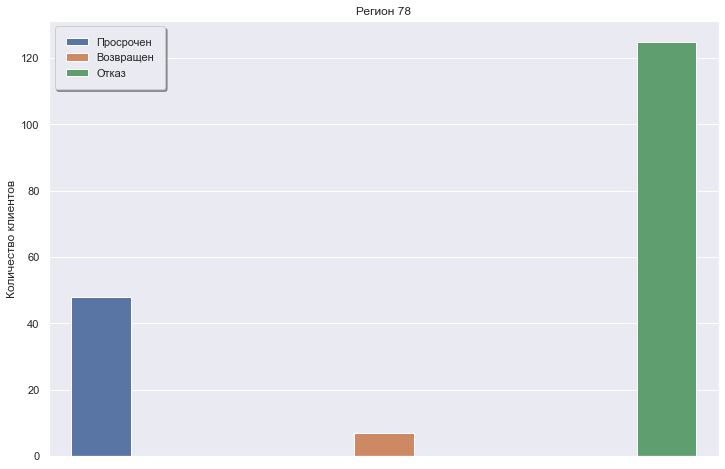

In [58]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
sns.countplot(x='bad', hue='bad', data=df_spb).set_title('Регион 78')
plt.xlabel('')
plt.ylabel('Количество клиентов')
plt.legend(['Просрочен', 'Возвращен', 'Отказ'], loc=2,
fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.tick_params(
    axis='x',        
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.show()

In [59]:
df_spb.bad.value_counts()

2.0    125
0.0     48
1.0      7
Name: bad, dtype: int64

In [60]:
round(df_spb.bad.value_counts().loc[1.0] / df_spb.bad.value_counts().sum() * 100, 2)

3.89

---
### 1.2. Распределение клиентов, подавших заявку в регионе 88, в зависимости от переменной bad
---

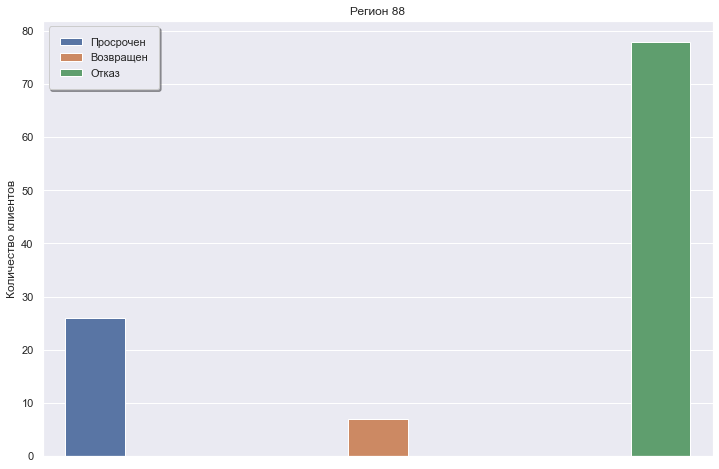

In [61]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
sns.countplot(x='bad', hue='bad', data=df_kr).set_title('Регион 88')
plt.xlabel('')
plt.ylabel('Количество клиентов')
plt.legend(['Просрочен', 'Возвращен', 'Отказ'], loc=2,
fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.tick_params(
    axis='x',        
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.show()

In [62]:
df_kr.bad.value_counts()

2.0    78
0.0    26
1.0     7
Name: bad, dtype: int64

In [63]:
round(df_kr.bad.value_counts().loc[1.0] / df_kr.bad.value_counts().sum() * 100, 2)

6.31

---
### 2.1. Распределение клиентов, подавших заявку в регионе 78, в зависимости от их профессии
---

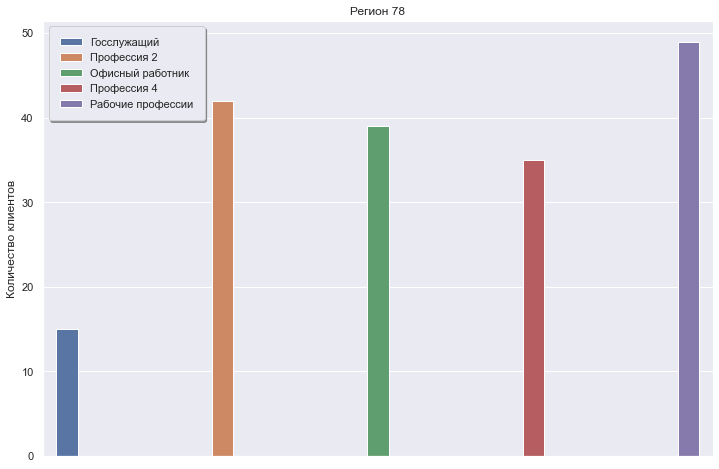

In [64]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
sns.countplot(x='work_code', hue='work_code', data=df_spb).set_title('Регион 78')
plt.xlabel('')
plt.ylabel('Количество клиентов')
plt.legend(['Госслужащий', 'Профессия 2', 'Офисный работник', 'Профессия 4', 'Рабочие профессии'], loc=2,
fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.tick_params(
    axis='x',        
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.show()

---
### 2.2. Распределение клиентов, подавших заявку в регионе 88, в зависимости от их профессии
---

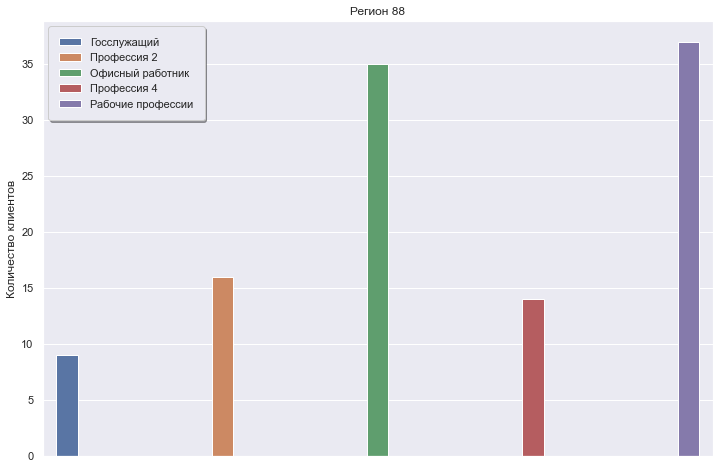

In [65]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
sns.countplot(x='work_code', hue='work_code', data=df_kr).set_title('Регион 88')
plt.xlabel('')
plt.ylabel('Количество клиентов')
plt.legend(['Госслужащий', 'Профессия 2', 'Офисный работник', 'Профессия 4', 'Рабочие профессии'], loc=2,
fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.tick_params(
    axis='x',        
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.show()

---
### 3.1. Распределение клиентов, подавших заявку в регионе 78, в зависимости от их профессии и от того факта, одобрено или отказано им в кредите
---

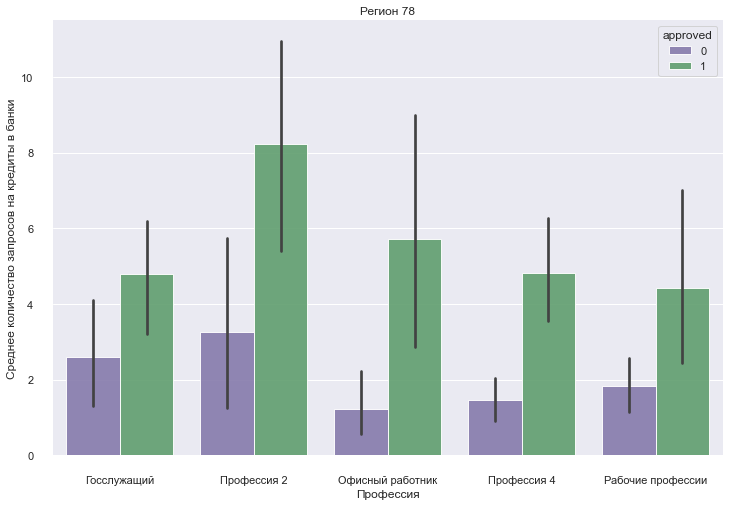

In [66]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
sns.barplot(x="work_code", y="bank_inqs_count_quarter",
            hue="approved", palette=["m", "g"],
            data=df_spb, alpha=0.9) \
                .set_title('Регион 78')
plt.xticks([0, 1, 2, 3, 4], ['Госслужащий', 'Профессия 2', 'Офисный работник', 'Профессия 4', 'Рабочие профессии'])
plt.xlabel('Профессия')
plt.ylabel('Среднее количество запросов на кредиты в банки')
sns.despine(offset=10, trim=True)

In [67]:
pivot_df_spb = df_spb.groupby(['work_code', 'approved'], as_index=False) \
    .agg({'bank_inqs_count_quarter' : 'mean'}) \
        .pivot(index='work_code', columns='approved', values='bank_inqs_count_quarter').round()
pivot_df_spb

approved,0,1
work_code,,
1,3.0,5.0
2,3.0,8.0
3,1.0,6.0
4,1.0,5.0
5,2.0,4.0


---
### 3.2. Распределение клиентов, подавших заявку в регионе 88, в зависимости от их профессии и от того факта, одобрено или отказано им в кредите
---

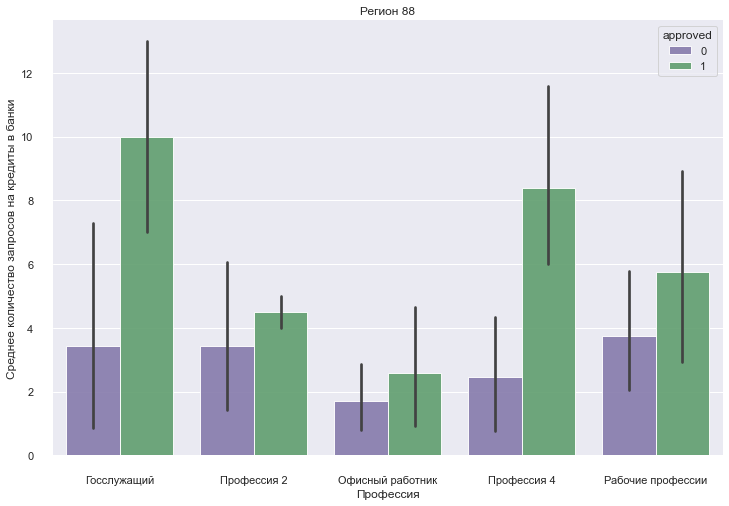

In [68]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
sns.barplot(x="work_code", y="bank_inqs_count_quarter",
            hue="approved", palette=["m", "g"],
            data=df_kr, alpha=0.9) \
                .set_title('Регион 88')
plt.xticks([0, 1, 2, 3, 4], ['Госслужащий', 'Профессия 2', 'Офисный работник', 'Профессия 4', 'Рабочие профессии'])
plt.xlabel('Профессия')
plt.ylabel('Среднее количество запросов на кредиты в банки')
sns.despine(offset=10, trim=True)

In [69]:
pivot_df_kr = df_kr.groupby(['work_code', 'approved'], as_index=False) \
    .agg({'bank_inqs_count_quarter' : 'mean'}) \
        .pivot(index='work_code', columns='approved', values='bank_inqs_count_quarter').round()
pivot_df_kr

approved,0,1
work_code,,
1,3.0,10.0
2,3.0,4.0
3,2.0,3.0
4,2.0,8.0
5,4.0,6.0
